In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:

# Step 1: Load data
file_1_path = '/content/drive/MyDrive/Code/File-1.csv'
log_path = '/content/drive/MyDrive/Code/Log.xlsx'

file_1 = pd.read_csv(file_1_path)
log = pd.read_excel(log_path)

# Step 2: Preprocess data in File-1.csv
file_1['HomeID'] = file_1['HomeID'].astype(str).str.lstrip('0')

# Step 3: Identify the column to update in File-1.csv
update_column = 'Data'  #this is a column I developed so that it can be populated with occupancy data

import pandas as pd

# Load data from Log.xlsx; this is the original code for occupant activity
log_path = '/content/drive/MyDrive/Code/Log.xlsx'
log = pd.read_excel(log_path)

# Print the column names
print(log.columns)

# Step 4: Iterate through Log.xlsx and update File-1.csv
for index, log_row in log.iterrows():
    date = log_row['Date']
    home_id = str(log_row['Home_ID']).lstrip('0')

    # Find matching rows in File-1.csv
    matching_rows = file_1[(file_1['Date'] == date) & (file_1['HomeID'] == home_id)]

    # Update corresponding cells in File-1.csv
    for timeframe, value in zip(['A', 'B', 'C', 'D', 'E'], log_row[['H', 'I', 'J', 'K', 'L']]):
        timeframe_col = f'Timeframes_{timeframe}'
        file_1.loc[matching_rows.index, timeframe_col] = value

        # Update the specified column in File-1.csv
        data_col = 'Data'
        file_1.loc[matching_rows.index, data_col] = value

# Step 5: Save the updated data to a new CSV file
updated_file_1_path = '/content/drive/MyDrive/Code/Updated_File-1.csv'
file_1.to_csv(updated_file_1_path, index=False)



Index(['Home_ID', 'Date', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'H', 'I', 'J', 'K', 'L', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')
Updated data saved to /content/drive/MyDrive/Code/Updated_File-1.csv


In [ ]:
#Add a column to represent time spent on Cooktop; this populates data for cooktop across different timeframes (or alternatively referred to cooktime)
import pandas as pd

# the columns to fill out in our file
timeframe_columns = ['H', 'I', 'J', 'K', 'L']

# the timesframes, for simplicitly, have been given letters (e.g 7-11 represents timeframe A, 11-13 represents timeframe B, 13-17 represents C,
#13-21 represents D, 21-24 represents E )

# file_1 DataFrame has columns 'HomeID', 'Date', 'Timeframes', 'Data'
file_1 = pd.DataFrame(columns=['HomeID', 'Date', 'Timeframes', 'Data'])

# Iterate over rows in log DataFrame
for index, log_row in log.iterrows():
    # Extract HomeID and Date from log
    home_id = log_row['Home_ID']
    date = log_row['Date']

    # Iterate over timeframes and values
    for timeframe, column_name in zip(['A', 'B', 'C', 'D', 'E'], timeframe_columns):
        # Extract value from log_row
        value = log_row[column_name]

        # Append to file_1 DataFrame
        file_1 = file_1.append({'HomeID': home_id, 'Date': date, 'Timeframes': timeframe, 'Data': value}, ignore_index=True)

# Display the resulting DataFrame
file_1.head(20)

# Save the DataFrame to a CSV file; relevent to cooktime
file_1.to_csv('/content/drive/MyDrive/Code/File-1_-Cooktime.csv', index=False)



<ipython-input-29-d3bc51dc6cc3>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({'HomeID': home_id, 'Date': date, 'Timeframes': timeframe, 'Data': value}, ignore_index=True)
<ipython-input-29-d3bc51dc6cc3>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({'HomeID': home_id, 'Date': date, 'Timeframes': timeframe, 'Data': value}, ignore_index=True)
<ipython-input-29-d3bc51dc6cc3>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({'HomeID': home_id, 'Date': date, 'Timeframes': timeframe, 'Data': value}, ignore_index=True)
<ipython-input-29-d3bc51dc6cc3>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [ ]:
# preparing occupancy data and populating the column with occupancy for the data points in file_1

# Load data from Log.xlsx
log_path = '/content/drive/MyDrive/Code/Log.xlsx'
log = pd.read_excel(log_path)

# The Log DataFrame under examination has columns 'C', 'D', 'E', 'F', 'G'
timeframe_columns = ['C', 'D', 'E', 'F', 'G']

# Our file_1 DataFrame, or cumulative dataframe, has columns 'HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy'
file_1 = pd.DataFrame(columns=['HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy'])

# Iterate over rows in log DataFrame
for index, log_row in log.iterrows():
    # Extract HomeID and Date from log
    home_id = log_row['Home_ID']
    date = log_row['Date']

    # Iterate over timeframes and values
    for timeframe, column_name in zip(['A', 'B', 'C', 'D', 'E'], timeframe_columns):
        # Extract values from log_row for the new "Occupancy" column
        value_occupancy = log_row[column_name]

        # Extract existing value from the "Data" column in file_1, or use a default value if not found
        existing_data = file_1.loc[
            (file_1['HomeID'] == home_id) & (file_1['Date'] == date) & (file_1['Timeframes'] == timeframe), 'Data'
        ]

        if not existing_data.empty:
            existing_data = existing_data.iat[0]
        else:
            existing_data = None

        # Append to file_1 DataFrame without modifying the "Data" column
        file_1 = file_1.append({
            'HomeID': home_id,
            'Date': date,
            'Timeframes': timeframe,
            'Data': existing_data,
            'Occupancy': value_occupancy
        }, ignore_index=True)

# Display the resulting DataFrame
file_1.head(20)
# Save the DataFrame to a CSV file
file_1.to_csv('/content/drive/MyDrive/Code/File-1_occupancy.csv', index=False)



<ipython-input-30-391e9c7f52ce>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-30-391e9c7f52ce>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-30-391e9c7f52ce>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-30-391e9c7f52ce>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-30-391e9c7f52ce>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-30-39

In [ ]:
#Information on the duration that oven time is used; this data is cruical to determine impacts of cooking on IAQ
import pandas as pd

# Load data from Log.xlsx
log_path = '/content/drive/MyDrive/Code/Log.xlsx'
log = pd.read_excel(log_path)

# log DataFrame has columns 'M', 'N', 'O', 'P', 'Q'
timeframe_columns = ['M', 'N', 'O', 'P', 'Q']

# Our file_1 DataFrame, or cumulative dataframe, has columns 'HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy'
file_1 = pd.DataFrame(columns=['HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy'])

# Iterate over rows in log DataFrame
for index, log_row in log.iterrows():
    # Extract HomeID and Date from log
    home_id = log_row['Home_ID']
    date = log_row['Date']

    # Iterate over timeframes and values
    for timeframe, column_name in zip(['A', 'B', 'C', 'D', 'E'], timeframe_columns):
        # Extract values from log_row
        value_data = log_row[column_name]

        # Extract values from log_row for the new "Occupancy" column
        value_occupancy = log_row[column_name]

        # Extract values from log_row for the new "Oven" column
        value_oven = log_row[column_name]

        # Append to file_1 DataFrame
        file_1 = file_1.append({
            'HomeID': home_id,
            'Date': date,
            'Timeframes': timeframe,
            'Data': value_data,
            'Occupancy': value_occupancy,
            'Oven': value_oven
        }, ignore_index=True)

# Save the DataFrame to a CSV file
file_1.to_csv('/content/drive/MyDrive/Code/File-1_oven.csv', index=False)

# Display the resulting DataFrame
file_1.head(20)


Index(['Home_ID', 'Date', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG'],
      dtype='object')


<ipython-input-31-a35186b0a89a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-31-a35186b0a89a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-31-a35186b0a89a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-31-a35186b0a89a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-31-a35186b0a89a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-31-a3

HomeID       Date Timeframes  Data  Occupancy  Oven
0       1 2017-05-14          A   NaN        NaN   NaN
1       1 2017-05-14          B   NaN        NaN   NaN
2       1 2017-05-14          C  50.0       50.0  50.0
3       1 2017-05-14          D   NaN        NaN   NaN
4       1 2017-05-14          E   NaN        NaN   NaN
5       1 2017-05-15          A   NaN        NaN   NaN
6       1 2017-05-15          B   NaN        NaN   NaN
7       1 2017-05-15          C   NaN        NaN   NaN
8       1 2017-05-15          D   NaN        NaN   NaN
9       1 2017-05-15          E   NaN        NaN   NaN
10      1 2017-05-16          A   NaN        NaN   NaN
11      1 2017-05-16          B   NaN        NaN   NaN
12      1 2017-05-16          C   NaN        NaN   NaN
13      1 2017-05-16          D   NaN        NaN   NaN
14      1 2017-05-16          E   NaN        NaN   NaN
15      1 2017-05-17          A   NaN        NaN   NaN
16      1 2017-05-17          B   NaN        NaN   NaN
17      1 2017-05-17          C   NaN        NaN   NaN
18      1 2017-05-17          D  45.0       45.0  45.0
19      1 2017-05-17          E   NaN        NaN   NaN

In [ ]:
#BBQ Time and Indoor Air Quality
import pandas as pd

# Load data from Log.xlsx
log_path = '/content/drive/MyDrive/Code/Log.xlsx'
log = pd.read_excel(log_path)

# Print the column names
print(log.columns)

# the log DataFrame has columns 'R', 'S', 'T', 'U', 'V'
timeframe_columns = ['R', 'S', 'T', 'U', 'V']

# the file_1 DataFrame has columns 'HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy', 'Oven'
file_1 = pd.DataFrame(columns=['HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy', 'Oven'])

# Iterate over rows in log DataFrame
for index, log_row in log.iterrows():
    # Extract HomeID and Date from log
    home_id = log_row['Home_ID']
    date = log_row['Date']

    # Iterate over timeframes and values
    for timeframe, column_name in zip(['A', 'B', 'C', 'D', 'E'], timeframe_columns):
        # Extract values from log_row
        value_data = log_row[column_name]

        # Extract values from log_row for the new "Occupancy" column
        value_occupancy = log_row[column_name]

        # Extract values from log_row for the new "Oven" column
        value_oven = log_row[column_name]

        # Extract values from log_row for the new "BBQ time" column
        value_bbq_time = log_row[column_name]

        # Append to file_1 DataFrame
        file_1 = file_1.append({
            'HomeID': home_id,
            'Date': date,
            'Timeframes': timeframe,
            'Data': value_data,
            'Occupancy': value_occupancy,
            'Oven': value_oven,
            'BBQ time': value_bbq_time
        }, ignore_index=True)

# Save the DataFrame to a CSV file
file_1.to_csv('/content/drive/MyDrive/Code/File-1_BBQ.csv', index=False)

# Display the resulting DataFrame
file_1.head(20)


Index(['Home_ID', 'Date', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG'],
      dtype='object')


<ipython-input-32-780ed924d4a9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-32-780ed924d4a9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-32-780ed924d4a9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-32-780ed924d4a9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-32-780ed924d4a9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-32-78

HomeID       Date Timeframes  Data  Occupancy  Oven  BBQ time
0       1 2017-05-14          A   NaN        NaN   NaN       NaN
1       1 2017-05-14          B   NaN        NaN   NaN       NaN
2       1 2017-05-14          C   NaN        NaN   NaN       NaN
3       1 2017-05-14          D   NaN        NaN   NaN       NaN
4       1 2017-05-14          E   NaN        NaN   NaN       NaN
5       1 2017-05-15          A   NaN        NaN   NaN       NaN
6       1 2017-05-15          B   NaN        NaN   NaN       NaN
7       1 2017-05-15          C   NaN        NaN   NaN       NaN
8       1 2017-05-15          D   NaN        NaN   NaN       NaN
9       1 2017-05-15          E   NaN        NaN   NaN       NaN
10      1 2017-05-16          A   NaN        NaN   NaN       NaN
11      1 2017-05-16          B   NaN        NaN   NaN       NaN
12      1 2017-05-16          C   NaN        NaN   NaN       NaN
13      1 2017-05-16          D   NaN        NaN   NaN       NaN
14      1 2017-05-16          E   NaN        NaN   NaN       NaN
15      1 2017-05-17          A   NaN        NaN   NaN       NaN
16      1 2017-05-17          B   NaN        NaN   NaN       NaN
17      1 2017-05-17          C   NaN        NaN   NaN       NaN
18      1 2017-05-17          D   NaN        NaN   NaN       NaN
19      1 2017-05-17          E   NaN        NaN   NaN       NaN

In [ ]:
#Populating duration allocated for vacuuming across the datapoints

# Load data from Log.xlsx
log_path = '/content/drive/MyDrive/Code/Log.xlsx'
log = pd.read_excel(log_path)

# The log DataFrame has columns 'W', 'X', 'Y', 'Z', 'AA'
timeframe_columns = ['W', 'X', 'Y', 'Z', 'AA']

file_1 = pd.DataFrame(columns=['HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy', 'Oven', 'BBQ time'])

# Iterate over rows in log DataFrame
for index, log_row in log.iterrows():
    # Extract HomeID and Date from log
    home_id = log_row['Home_ID']
    date = log_row['Date']

    # Iterate over timeframes and values
    for timeframe, column_name in zip(['A', 'B', 'C', 'D', 'E'], timeframe_columns):
        # Extract values from log_row
        value_data = log_row[column_name]

        # Extract values from log_row for the new "Occupancy" column
        value_occupancy = log_row[column_name]

        # Extract values from log_row for the new "Oven" column
        value_oven = log_row[column_name]

        # Extract values from log_row for the new "BBQ time" column
        value_bbq_time = log_row[column_name]

        # Extract values from log_row for the new "Vacuuming" column
        value_vacuuming = log_row[column_name]

        # Append to file_1 DataFrame
        file_1 = file_1.append({
            'HomeID': home_id,
            'Date': date,
            'Timeframes': timeframe,
            'Data': value_data,
            'Occupancy': value_occupancy,
            'Oven': value_oven,
            'BBQ time': value_bbq_time,
            'Vacuuming': value_vacuuming
        }, ignore_index=True)

# Save the DataFrame to a CSV file
file_1.to_csv('/content/drive/MyDrive/Code/File-1_vaccuming.csv', index=False)

# Display the resulting DataFrame
file_1.head(20)


Index(['Home_ID', 'Date', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG'],
      dtype='object')


<ipython-input-33-2ad501f13303>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-33-2ad501f13303>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-33-2ad501f13303>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-33-2ad501f13303>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-33-2ad501f13303>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-33-2a

HomeID       Date Timeframes  Data  Occupancy  Oven  BBQ time  Vacuuming
0       1 2017-05-14          A   NaN        NaN   NaN       NaN        NaN
1       1 2017-05-14          B  20.0       20.0  20.0      20.0       20.0
2       1 2017-05-14          C  20.0       20.0  20.0      20.0       20.0
3       1 2017-05-14          D   NaN        NaN   NaN       NaN        NaN
4       1 2017-05-14          E   NaN        NaN   NaN       NaN        NaN
5       1 2017-05-15          A   NaN        NaN   NaN       NaN        NaN
6       1 2017-05-15          B   NaN        NaN   NaN       NaN        NaN
7       1 2017-05-15          C   NaN        NaN   NaN       NaN        NaN
8       1 2017-05-15          D   NaN        NaN   NaN       NaN        NaN
9       1 2017-05-15          E   NaN        NaN   NaN       NaN        NaN
10      1 2017-05-16          A   NaN        NaN   NaN       NaN        NaN
11      1 2017-05-16          B   NaN        NaN   NaN       NaN        NaN
12      1 2017-05-16          C   NaN        NaN   NaN       NaN        NaN
13      1 2017-05-16          D   NaN        NaN   NaN       NaN        NaN
14      1 2017-05-16          E   NaN        NaN   NaN       NaN        NaN
15      1 2017-05-17          A   NaN        NaN   NaN       NaN        NaN
16      1 2017-05-17          B   NaN        NaN   NaN       NaN        NaN
17      1 2017-05-17          C   NaN        NaN   NaN       NaN        NaN
18      1 2017-05-17          D   NaN        NaN   NaN       NaN        NaN
19      1 2017-05-17          E   NaN        NaN   NaN       NaN        NaN

In [ ]:
#Duration of open windows and its relevance to IAQ
import pandas as pd

# Load data from Log.xlsx
log_path = '/content/drive/MyDrive/Code/Log.xlsx'
log = pd.read_excel(log_path)


# The log DataFrame has columns 'AB', 'AC', 'AD', 'AE', 'AF'
timeframe_columns = ['AB', 'AC', 'AD', 'AE', 'AF']

file_1 = pd.DataFrame(columns=['HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy', 'Oven', 'BBQ time', 'Vacuuming', 'Windows Open'])

# Iterate over rows in log DataFrame
for index, log_row in log.iterrows():
    # Extract HomeID and Date from log
    home_id = log_row['Home_ID']
    date = log_row['Date']

    # Iterate over timeframes and values
    for timeframe, column_name in zip(['A', 'B', 'C', 'D', 'E'], timeframe_columns):
        # Extract values from log_row
        value_data = log_row[column_name]

        # Extract values from log_row for the new "Occupancy" column
        value_occupancy = log_row[column_name]

        # Extract values from log_row for the new "Oven" column
        value_oven = log_row[column_name]

        # Extract values from log_row for the new "BBQ time" column
        value_bbq_time = log_row[column_name]

        # Extract values from log_row for the new "Vacuuming" column
        value_vacuuming = log_row[column_name]

        # Extract values from log_row for the new "Windows Open" column
        value_windows_open = log_row[column_name]

        # Append to file_1 DataFrame
        file_1 = file_1.append({
            'HomeID': home_id,
            'Date': date,
            'Timeframes': timeframe,
            'Data': value_data,
            'Occupancy': value_occupancy,
            'Oven': value_oven,
            'BBQ time': value_bbq_time,
            'Vacuuming': value_vacuuming,
            'Windows Open': value_windows_open
        }, ignore_index=True)

# Save the DataFrame to a CSV file
file_1.to_csv('/content/drive/MyDrive/Code/File-1_windows.csv', index=False)

# Display the resulting DataFrame
file_1.head(20)


Index(['Home_ID', 'Date', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG'],
      dtype='object')


<ipython-input-34-53c254e77695>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-34-53c254e77695>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-34-53c254e77695>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-34-53c254e77695>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-34-53c254e77695>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-34-53

HomeID       Date Timeframes Data Occupancy Oven BBQ time Vacuuming  \
0       1 2017-05-14          A  NaN       NaN  NaN      NaN       NaN   
1       1 2017-05-14          B  NaN       NaN  NaN      NaN       NaN   
2       1 2017-05-14          C  NaN       NaN  NaN      NaN       NaN   
3       1 2017-05-14          D  NaN       NaN  NaN      NaN       NaN   
4       1 2017-05-14          E  NaN       NaN  NaN      NaN       NaN   
5       1 2017-05-15          A  NaN       NaN  NaN      NaN       NaN   
6       1 2017-05-15          B  NaN       NaN  NaN      NaN       NaN   
7       1 2017-05-15          C  NaN       NaN  NaN      NaN       NaN   
8       1 2017-05-15          D  NaN       NaN  NaN      NaN       NaN   
9       1 2017-05-15          E  NaN       NaN  NaN      NaN       NaN   
10      1 2017-05-16          A  NaN       NaN  NaN      NaN       NaN   
11      1 2017-05-16          B  NaN       NaN  NaN      NaN       NaN   
12      1 2017-05-16          C  NaN       NaN  NaN      NaN       NaN   
13      1 2017-05-16          D  NaN       NaN  NaN      NaN       NaN   
14      1 2017-05-16          E  NaN       NaN  NaN      NaN       NaN   
15      1 2017-05-17          A  NaN       NaN  NaN      NaN       NaN   
16      1 2017-05-17          B  NaN       NaN  NaN      NaN       NaN   
17      1 2017-05-17          C  NaN       NaN  NaN      NaN       NaN   
18      1 2017-05-17          D  NaN       NaN  NaN      NaN       NaN   
19      1 2017-05-17          E  NaN       NaN  NaN      NaN       NaN   

   Windows Open  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN  
9           NaN  
10          NaN  
11          NaN  
12          NaN  
13          NaN  
14          NaN  
15          NaN  
16          NaN  
17          NaN  
18          NaN  
19          NaN

In [ ]:
#This is development of a new parameter (Air Quality) based on categorization
#Good if this research is good and you submited on time!
#No if the research is not good

import pandas as pd

# Load data from Log.xlsx
log_path = '/content/drive/MyDrive/Code/Log.xlsx'
log = pd.read_excel(log_path)

# The log DataFrame has columns 'AG' for timeframes 'A', 'B', 'C', 'D', 'E'
timeframe_columns = ['AG', 'AG', 'AG', 'AG', 'AG']

# The file_1 DataFrame has columns 'HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy', 'Oven', 'BBQ time', 'Vacuuming', 'Windows Open', 'Air Quality'
file_1 = pd.DataFrame(columns=['HomeID', 'Date', 'Timeframes', 'Data', 'Occupancy', 'Oven', 'BBQ time', 'Vacuuming', 'Windows Open', 'Air Quality'])

# Iterate over rows in log DataFrame
for index, log_row in log.iterrows():
    # Extract HomeID and Date from log
    home_id = log_row['Home_ID']
    date = log_row['Date']

    # Iterate over timeframes and values
    for timeframe, column_name in zip(['A', 'B', 'C', 'D', 'E'], timeframe_columns):
        # Extract values from log_row
        value_data = log_row[column_name]

        # Extract values from log_row for the new "Occupancy" column
        value_occupancy = log_row[column_name]

        # Extract values from log_row for the new "Oven" column
        value_oven = log_row[column_name]

        # Extract values from log_row for the new "BBQ time" column
        value_bbq_time = log_row[column_name]

        # Extract values from log_row for the new "Vacuuming" column
        value_vacuuming = log_row[column_name]

        # Extract values from log_row for the new "Windows Open" column
        value_windows_open = log_row[column_name]

        # Extract values from log_row for the new "Air Quality" column
        value_air_quality = 'Good' if log_row[column_name] in ['humidifier', 'air freshener', 'air cleaner', 'diffuser'] else 'No'

        # Append to file_1 DataFrame
        file_1 = file_1.append({
            'HomeID': home_id,
            'Date': date,
            'Timeframes': timeframe,
            'Data': value_data,
            'Occupancy': value_occupancy,
            'Oven': value_oven,
            'BBQ time': value_bbq_time,
            'Vacuuming': value_vacuuming,
            'Windows Open': value_windows_open,
            'Air Quality': value_air_quality
        }, ignore_index=True)

# Save the DataFrame to a CSV file
file_1.to_csv('/content/drive/MyDrive/Code/File-1_quality.csv', index=False)

# Display the resulting DataFrame
file_1.head(20)


<ipython-input-35-6d21b37d64d7>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-35-6d21b37d64d7>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-35-6d21b37d64d7>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-35-6d21b37d64d7>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-35-6d21b37d64d7>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_1 = file_1.append({
<ipython-input-35-6d

HomeID       Date Timeframes Data Occupancy Oven BBQ time Vacuuming  \
0       1 2017-05-14          A  NaN       NaN  NaN      NaN       NaN   
1       1 2017-05-14          B  NaN       NaN  NaN      NaN       NaN   
2       1 2017-05-14          C  NaN       NaN  NaN      NaN       NaN   
3       1 2017-05-14          D  NaN       NaN  NaN      NaN       NaN   
4       1 2017-05-14          E  NaN       NaN  NaN      NaN       NaN   
5       1 2017-05-15          A  NaN       NaN  NaN      NaN       NaN   
6       1 2017-05-15          B  NaN       NaN  NaN      NaN       NaN   
7       1 2017-05-15          C  NaN       NaN  NaN      NaN       NaN   
8       1 2017-05-15          D  NaN       NaN  NaN      NaN       NaN   
9       1 2017-05-15          E  NaN       NaN  NaN      NaN       NaN   
10      1 2017-05-16          A  NaN       NaN  NaN      NaN       NaN   
11      1 2017-05-16          B  NaN       NaN  NaN      NaN       NaN   
12      1 2017-05-16          C  NaN       NaN  NaN      NaN       NaN   
13      1 2017-05-16          D  NaN       NaN  NaN      NaN       NaN   
14      1 2017-05-16          E  NaN       NaN  NaN      NaN       NaN   
15      1 2017-05-17          A  NaN       NaN  NaN      NaN       NaN   
16      1 2017-05-17          B  NaN       NaN  NaN      NaN       NaN   
17      1 2017-05-17          C  NaN       NaN  NaN      NaN       NaN   
18      1 2017-05-17          D  NaN       NaN  NaN      NaN       NaN   
19      1 2017-05-17          E  NaN       NaN  NaN      NaN       NaN   

   Windows Open Air Quality  
0           NaN          No  
1           NaN          No  
2           NaN          No  
3           NaN          No  
4           NaN          No  
5           NaN          No  
6           NaN          No  
7           NaN          No  
8           NaN          No  
9           NaN          No  
10          NaN          No  
11          NaN          No  
12          NaN          No  
13          NaN          No  
14          NaN          No  
15          NaN          No  
16          NaN          No  
17          NaN          No  
18          NaN          No  
19          NaN          No

<ipython-input-6-88ffc157692e>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = file_1[columns_for_correlation].corr()


Correlation Matrix:
           Occupancy  Cooktime      Oven  BBQ time  Vacuuming
Occupancy   1.000000  0.182656  0.063516  0.002908  -0.157800
Cooktime    0.182656  1.000000  0.356538  0.796373   0.144217
Oven        0.063516  0.356538  1.000000  0.370873  -0.266520
BBQ time    0.002908  0.796373  0.370873  1.000000        NaN
Vacuuming  -0.157800  0.144217 -0.266520       NaN   1.000000


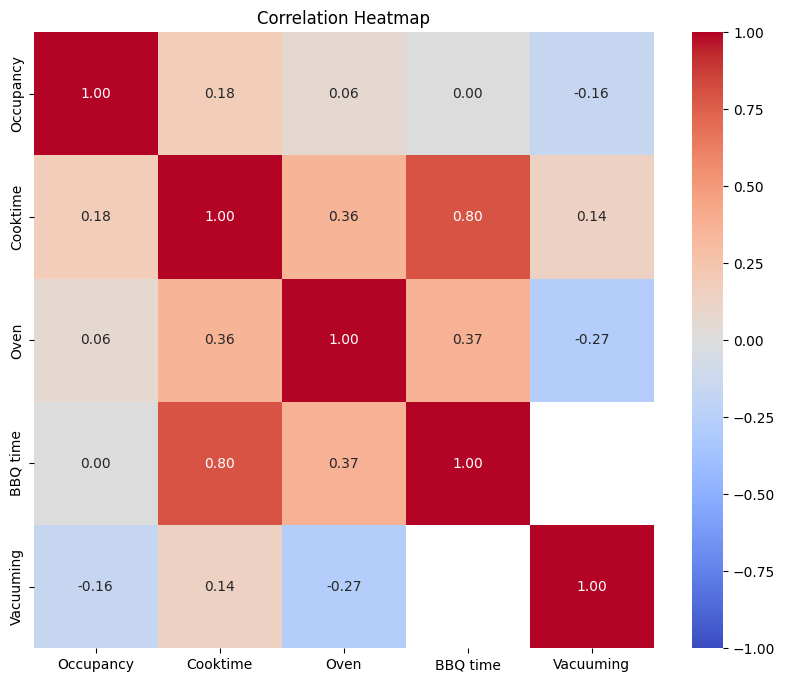

In [ ]:
#Develop a correlation matrix between different parameters
#Adding CO2 and NO2 concentration
#Correlation matrix

import pandas as pd

# Load the data from the CSV file
file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
file_1 = pd.read_csv(file_1_path)

# Select relevant columns for correlation analysis
columns_for_correlation = ['Occupancy', 'Cooktime', 'Oven',
                            'BBQ time', 'Vacuuming', 'Windows Open',
                            'Air Quality']

# Calculate the correlation matrix
correlation_matrix = file_1[columns_for_correlation].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-39-5c8dd1685ee5>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


           Occupancy  Cooktime      Oven  BBQ time  Vacuuming       CO2  \
Occupancy   1.000000  0.182656  0.063516  0.002908  -0.157800  0.057152   
Cooktime    0.182656  1.000000  0.356538  0.796373   0.144217  0.008289   
Oven        0.063516  0.356538  1.000000  0.370873  -0.266520  0.081166   
BBQ time    0.002908  0.796373  0.370873  1.000000        NaN -0.181697   
Vacuuming  -0.157800  0.144217 -0.266520       NaN   1.000000 -0.022619   
CO2         0.057152  0.008289  0.081166 -0.181697  -0.022619  1.000000   
NO2        -0.113455 -0.055376 -0.030174  0.240111  -0.048469 -0.057891   

                NO2  
Occupancy -0.113455  
Cooktime  -0.055376  
Oven      -0.030174  
BBQ time   0.240111  
Vacuuming -0.048469  
CO2       -0.057891  
NO2        1.000000  


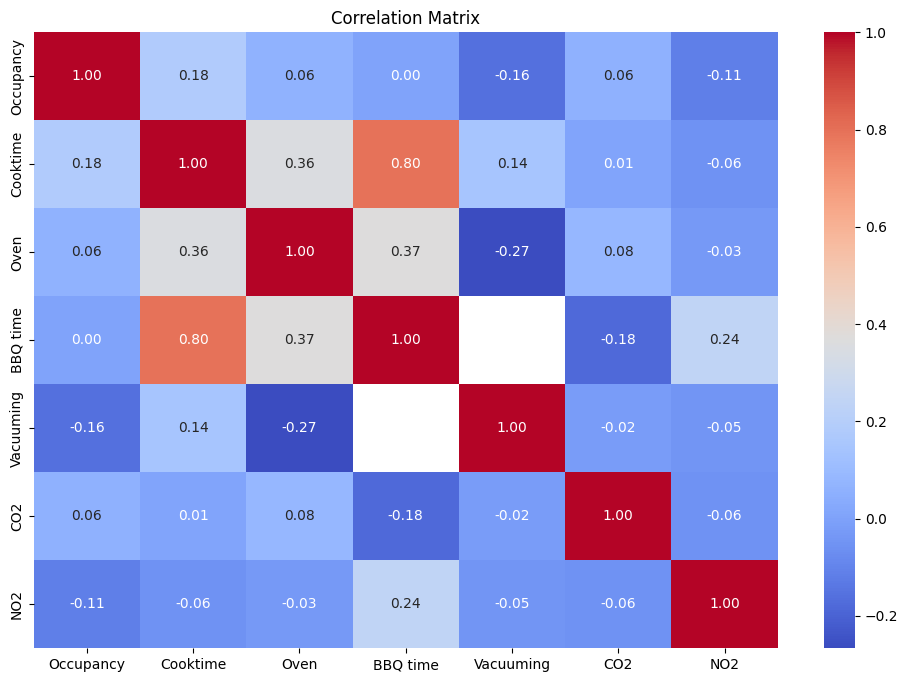

In [ ]:
#correlation matrix

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

# the columns to be included in the correlation analysis
columns_for_correlation = ['Occupancy', 'Cooktime', 'Oven', 'BBQ time', 'Vacuuming', 'Windows Open', 'Air Quality']

# Add 'CO2' and 'NO2' to the columns for correlation
columns_for_correlation += ['CO2', 'NO2']

# Subset the DataFrame with the selected columns
subset_df = df[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


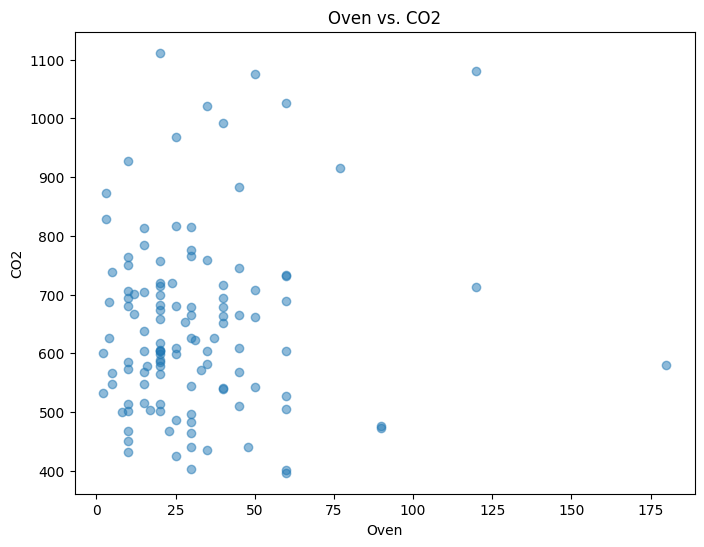

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)


x_column = 'Oven'
y_column = 'CO2'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title(f'{x_column} vs. {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()


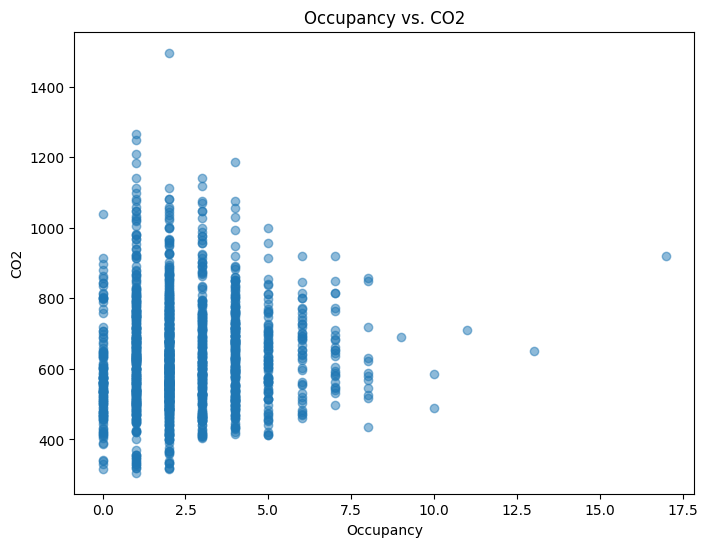

In [ ]:
#impacts of occupancy on CO2 concentrations

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)


x_column = 'Occupancy'
y_column = 'CO2'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title(f'{x_column} vs. {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()


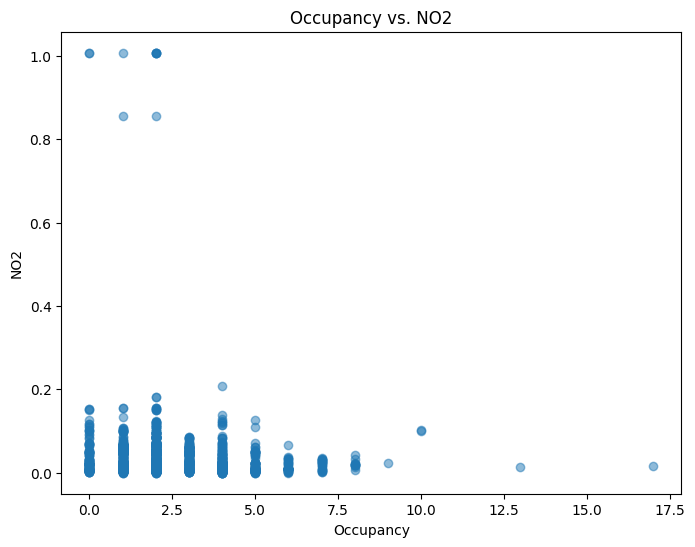

In [ ]:
#Representation of impacts of level of occupancy on NO2 concentrations
import pandas as pd
import matplotlib.pyplot as plt

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)


x_column = 'Occupancy'
y_column = 'NO2'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title(f'{x_column} vs. {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [ ]:
#impacts of occupancy on CO2 concentrations

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

occupancy_levels = [1, 2, 3, 4, 5, 6, 7]

# Calculate average CO2 concentration for each level of occupancy
average_concentrations = {}
for level in occupancy_levels:
    avg_concentration = df[df['Occupancy'] == level]['CO2'].mean()
    average_concentrations[level] = avg_concentration

# Display the results
for level, avg_concentration in average_concentrations.items():
    print(f'Average CO2 concentration for Occupancy {level}: {avg_concentration}')


Average CO2 concentration for Occupancy 1: 654.1157885704405
Average CO2 concentration for Occupancy 2: 628.6500752547556
Average CO2 concentration for Occupancy 3: 647.1920399168121
Average CO2 concentration for Occupancy 4: 651.3112770213861
Average CO2 concentration for Occupancy 5: 628.4851479467129
Average CO2 concentration for Occupancy 6: 653.6719693933969
Average CO2 concentration for Occupancy 7: 659.0124862842349


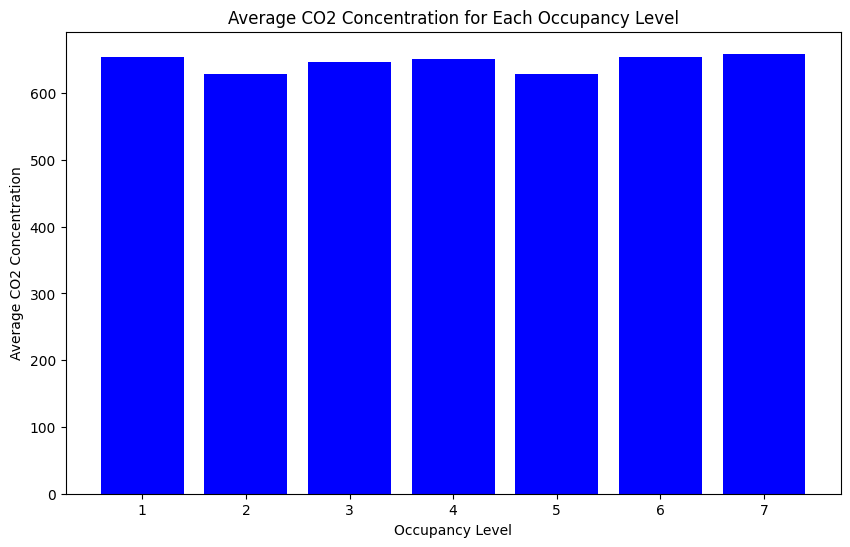

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_concentrations.keys(), average_concentrations.values(), color='blue')
plt.xlabel('Occupancy Level')
plt.ylabel('Average CO2 Concentration, ppm')
plt.title('Average CO2 Concentration for Each Occupancy Level')
plt.show()

Average CO2 concentration for Oven time below 30: 640.3312155993369
Average CO2 concentration for Oven time above or equal to 30: 650.4145443641007


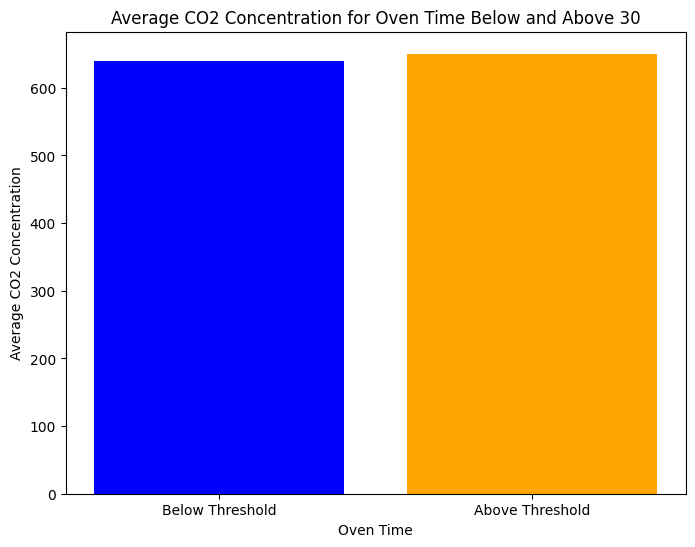

In [ ]:
#CO2 concentrations when time is set at a  threshold of 30 mins
#average CO2 concentration is computed

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

oven_threshold = 30

# Calculate average CO2 concentration for oven time below and above the threshold
average_concentration_below = df[df['Oven'] < oven_threshold]['CO2'].mean()
average_concentration_above = df[df['Oven'] >= oven_threshold]['CO2'].mean()

# Display the results
print(f'Average CO2 concentration for Oven time below {oven_threshold}: {average_concentration_below}')
print(f'Average CO2 concentration for Oven time above or equal to {oven_threshold}: {average_concentration_above}')

plt.figure(figsize=(8, 6))
plt.bar(['Below Threshold', 'Above Threshold'], [average_concentration_below, average_concentration_above], color=['blue', 'orange'])
plt.xlabel('Oven Time')
plt.ylabel('Average CO2 Concentration')
plt.title(f'Average CO2 Concentration for Oven Time Below and Above {oven_threshold}')
plt.show()

In [ ]:
# Average CO2 concentration determining when Air Quality Instances are "Good" vs "Bad"
#Good - positive implications on IAQ
#"Bad" - negative implications on IAQ

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

air_quality_yes = df[df['Air Quality'] == 'Good']['CO2'].mean()
air_quality_no = df[df['Air Quality'] == 'No']['CO2'].mean()

# Display the results
print(f'Average CO2 concentration when Air Quality is "Good": {air_quality_yes}')
print(f'Average CO2 concentration when Air Quality is "No": {air_quality_no}')


Average CO2 concentration when Air Quality is "Good": 723.4907202996366
Average CO2 concentration when Air Quality is "No": 630.1746487876916


In [ ]:
# Average NO2 concentration when Air Quality Instances are Good vs Bad
# categorization

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

air_quality_yes = df[df['Air Quality'] == 'Good']['NO2'].mean()
air_quality_no = df[df['Air Quality'] == 'No']['NO2'].mean()

# Display the results
print(f'Average NO2 concentration when Air Quality is "Good": {air_quality_yes}')
print(f'Average NO2 concentration when Air Quality is "No": {air_quality_no}')

Average NO2 concentration when Air Quality is "Good": 0.059391709149754016
Average NO2 concentration when Air Quality is "No": 0.04058670535643968


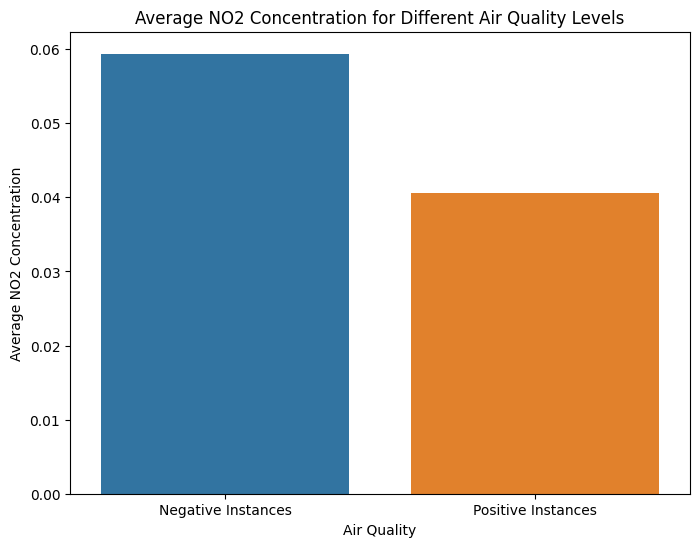

In [ ]:
#negative and positive instances
#impact on NO2 concentration

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

df['Air Quality'] = df['Air Quality'].replace({'Good': 'Negative Instances', 'No': 'Positive Instances'})
air_quality_means = df.groupby('Air Quality')['NO2'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Air Quality', y='NO2', data=air_quality_means)
plt.title('Average NO2 Concentration for Different Air Quality Levels')
plt.xlabel('Air Quality')
plt.ylabel('Average NO2 Concentration')
plt.show()



In [ ]:
#identify mean CO2 concentrations during winter vs summer months
#implications of seasons

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format
df['Month'] = df['Date'].dt.month  # Extract month from the date

# Define the months you're interested in
summer_months = [6, 7, 8, 9]  # June to September
winter_months = [1, 2, 3, 4]  # January to April

# Calculate average concentrations for summer and winter months
average_concentration_summer = df[df['Month'].isin(summer_months)]['CO2'].mean()
average_concentration_winter = df[df['Month'].isin(winter_months)]['CO2'].mean()

# Display the results
print(f'Average CO2 concentration during summer months: {average_concentration_summer}')
print(f'Average CO2 concentration during winter months: {average_concentration_winter}')


Average CO2 concentration during summer months: 649.4664733007194
Average CO2 concentration during winter months: 641.4592851784097


<ipython-input-57-38ee65b8f1ec>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format


In [ ]:
#determining average CO2 concentrations with and without vacuuming (20 mins)

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

df['Vacuuming'] = pd.to_numeric(df['Vacuuming'], errors='coerce')  # Convert 'Vacuuming' to numeric

# Define duration for presence and absence of vacuuming
with_vacuuming = df['Vacuuming'] > 20
without_vacuuming = df['Vacuuming'] < 20

# Calculate average concentrations for presence and absence of vacuuming
average_concentration_with_vacuuming = df[with_vacuuming]['CO2'].mean()
average_concentration_without_vacuuming = df[without_vacuuming]['CO2'].mean()

# Display the results
print(f'Average CO2 concentration with vacuuming: {average_concentration_with_vacuuming}')
print(f'Average CO2 concentration without vacuuming: {average_concentration_without_vacuuming}')


Average CO2 concentration with vacuuming: 650.3449504492359
Average CO2 concentration without vacuuming: 648.0485420468458


In [ ]:
#calculate median CO2 concentrations with and without vaccuming for duration of 20 mins

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

df['Vacuuming'] = pd.to_numeric(df['Vacuuming'], errors='coerce')  # Convert 'Vacuuming' to numeric

# Define durations for presence and absence of vacuuming
with_vacuuming = df['Vacuuming'] > 20
without_vacuuming = df['Vacuuming'] < 20

# Calculate median concentrations for presence and absence of vacuuming
median_concentration_with_vacuuming = df[with_vacuuming]['CO2'].median()
median_concentration_without_vacuuming = df[without_vacuuming]['CO2'].median()

# Display the results
print(f'Median CO2 concentration with vacuuming: {median_concentration_with_vacuuming}')
print(f'Median CO2 concentration without vacuuming: {median_concentration_without_vacuuming}')


Median CO2 concentration with vacuuming: 615.8381742738588
Median CO2 concentration without vacuuming: 600.3833333333333


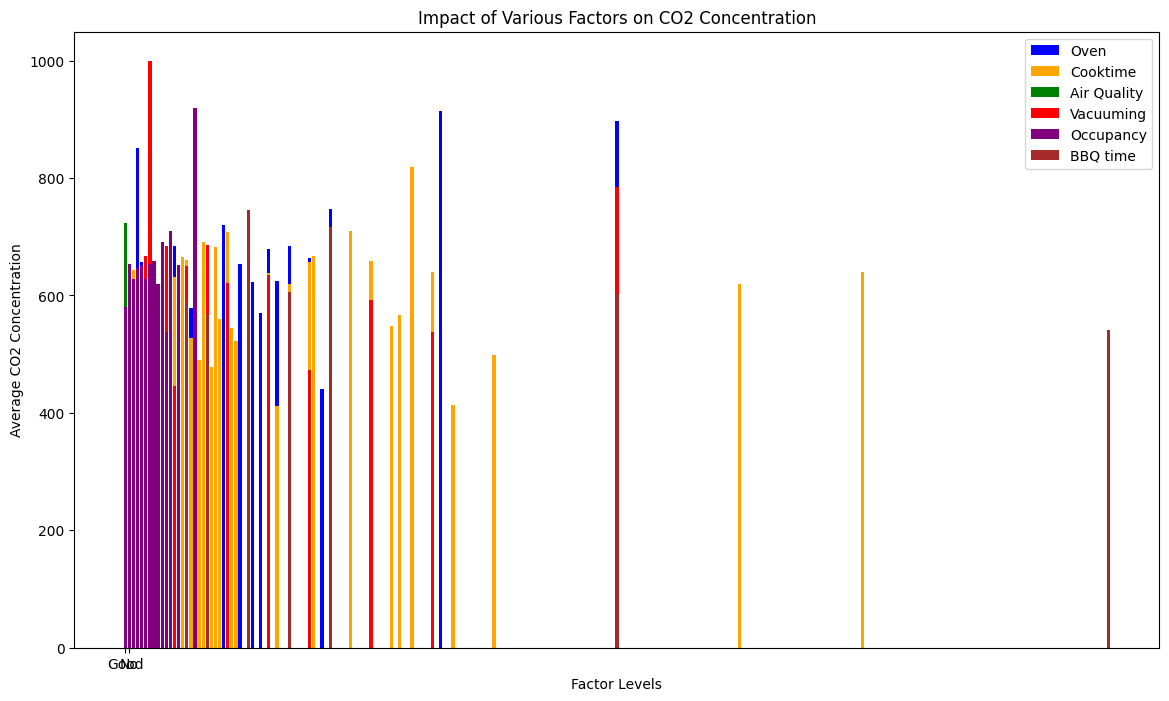

In [ ]:
#Graph - overall of all parameters

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

factors = ['Oven', 'Cooktime', 'Air Quality', 'Vacuuming', 'Occupancy', 'BBQ time']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Calculate average CO2 concentration for each factor
average_concentrations = []
for factor in factors:
    average_concentration = df.groupby(factor)['CO2'].mean()
    average_concentrations.append(average_concentration)

# Create a grouped bar plot
plt.figure(figsize=(14, 8))
for i, factor in enumerate(factors):
    plt.bar(average_concentrations[i].index, average_concentrations[i], color=colors[i], label=factor)

plt.xlabel('Factor Levels')
plt.ylabel('Average CO2 Concentration')
plt.title('Impact of Various Factors on CO2 Concentration')
plt.legend()
plt.show()


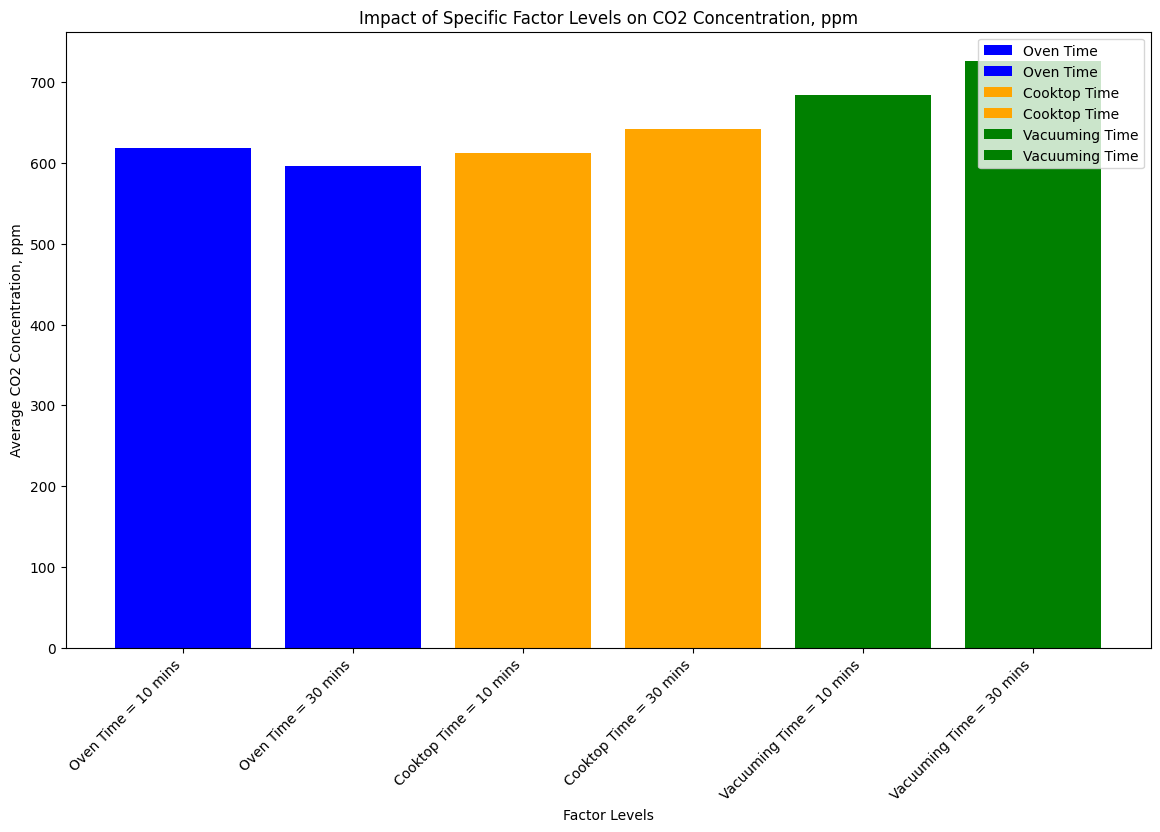

In [ ]:
#10 mins and 30 mins and impact of duration on CO2 average concentrations

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

factors = ['Oven', 'Cooktime','Vacuuming']
levels_to_compare = [10, 30]
colors = ['blue', 'orange', 'green', 'red']

# Create a bar plot for each factor level
plt.figure(figsize=(14, 8))
for i, factor in enumerate(factors):
    for level in levels_to_compare:
        subset_df = df[df[factor] == level]
        avg_concentration = subset_df['CO2'].mean()
        plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time = {level} mins', avg_concentration, color=colors[i], label=factor)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('Oven', 'Oven Time').replace('Cooktime', 'Cooktop Time').replace('Vacuuming', 'Vacuuming Time') for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Factor Levels')
plt.ylabel('Average CO2 Concentration, ppm')
plt.title('Impact of Specific Factor Levels on CO2 Concentration, ppm')
plt.show()


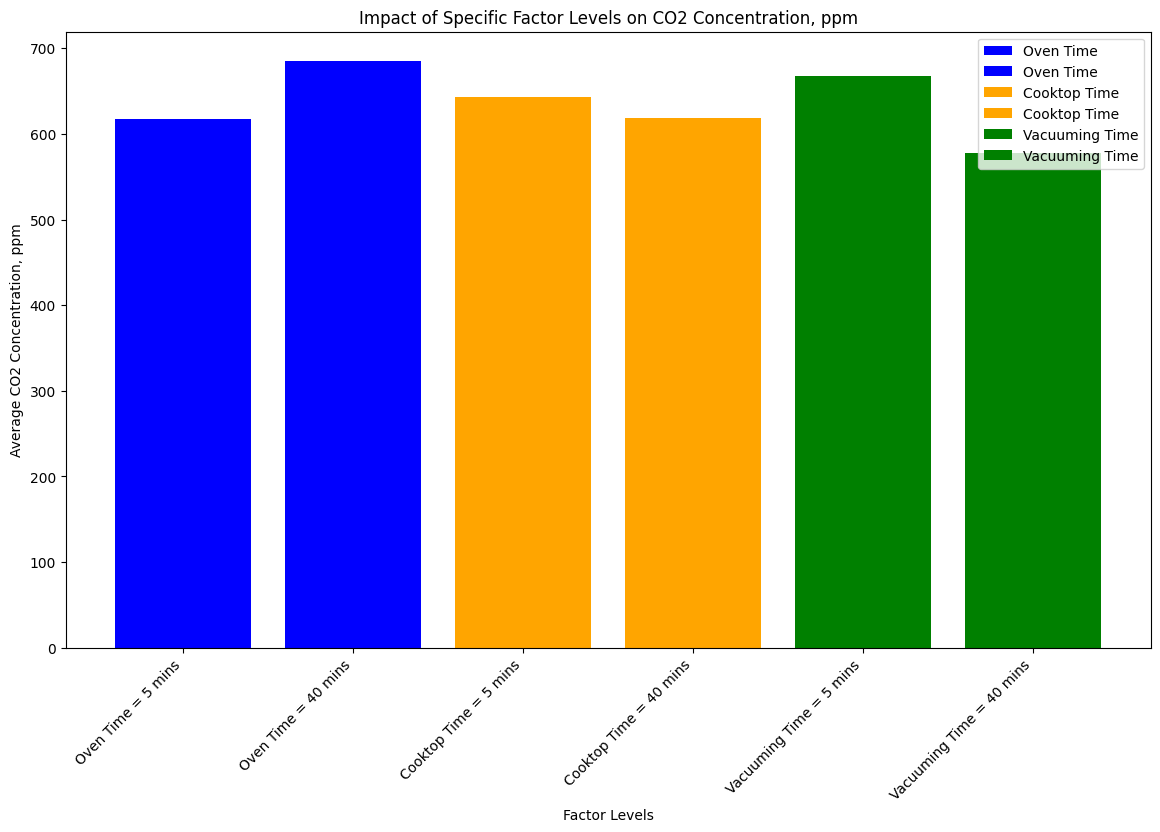

In [ ]:
#5 mins and 40 mins and impact of duration on CO2 average concentrations

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

factors = ['Oven', 'Cooktime','Vacuuming']
levels_to_compare = [5, 40]
colors = ['blue', 'orange', 'green', 'red']

# Create a bar plot for each factor level
plt.figure(figsize=(14, 8))
for i, factor in enumerate(factors):
    for level in levels_to_compare:
        subset_df = df[df[factor] == level]
        avg_concentration = subset_df['CO2'].mean()
        plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time = {level} mins', avg_concentration, color=colors[i], label=factor)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('Oven', 'Oven Time').replace('Cooktime', 'Cooktop Time').replace('Vacuuming', 'Vacuuming Time') for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Factor Levels')
plt.ylabel('Average CO2 Concentration, ppm')
plt.title('Impact of Specific Factor Levels on CO2 Concentration, ppm')
plt.show()


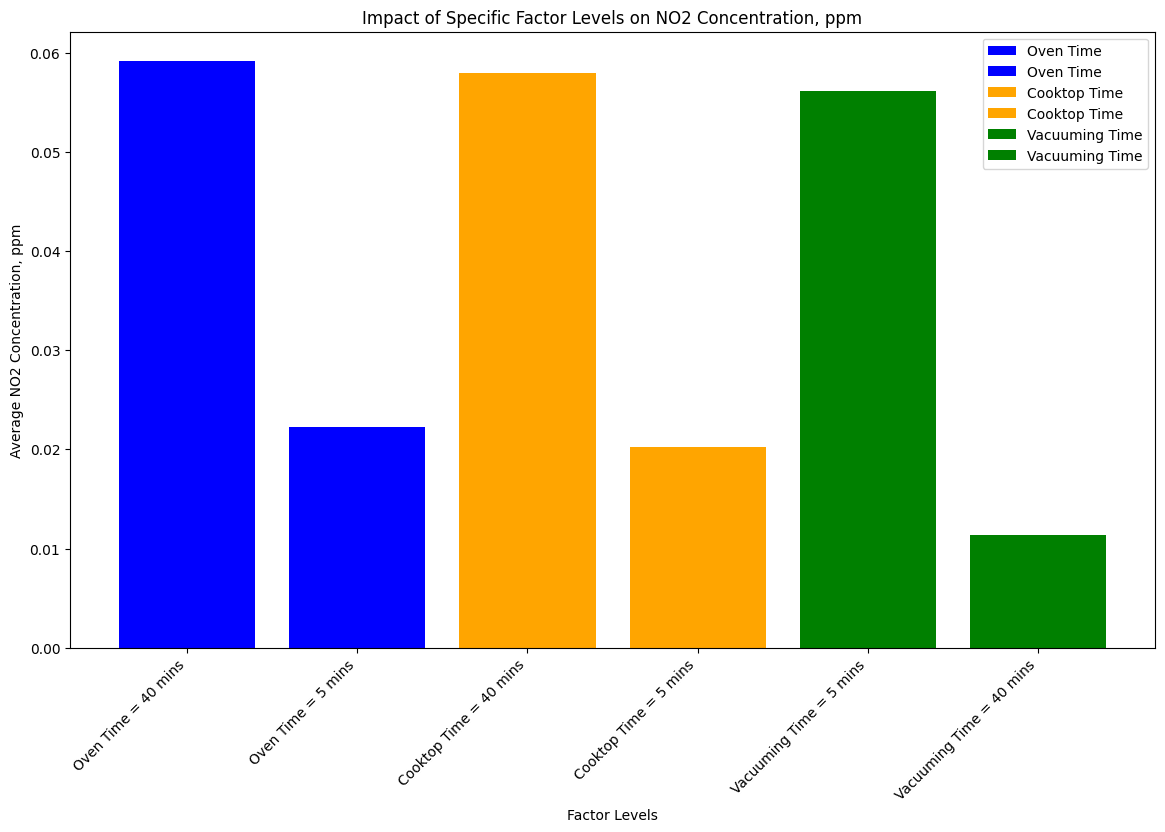

In [ ]:
#duration of 5 mins vs 40 mins and its impacts on NO2 concentrations

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

factors = ['Oven', 'Cooktime','Vacuuming']
levels_to_compare = [5, 40]  # Specify the levels to compare for each factor
colors = ['blue', 'orange', 'green', 'red']

# Create a bar plot for each factor level
plt.figure(figsize=(14, 8))
for i, factor in enumerate(factors):
    for level in levels_to_compare:
        subset_df = df[df[factor] == level]
        avg_concentration = subset_df['NO2'].mean()
        plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time = {level} mins', avg_concentration, color=colors[i], label=factor)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('Oven', 'Oven Time').replace('Cooktime', 'Cooktop Time').replace('Vacuuming', 'Vacuuming Time') for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Factor Levels')
plt.ylabel('Average NO2 Concentration, ppm')
plt.title('Impact of Specific Factor Levels on NO2 Concentration, ppm')
plt.show()


In [ ]:
#outliers assuming normal distribution
#IQR method

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

df['Date'] = pd.to_datetime(df['Date'])

# Group data by 6-month intervals and calculate the average CO2 concentration
df['6_month_interval'] = pd.to_datetime(df['Date']).dt.to_period("6M")
average_concentration_by_interval = df.groupby('6_month_interval')['CO2'].mean()

# Calculate the Interquartile Range (IQR) for each 6-month interval
Q1 = average_concentration_by_interval.quantile(0.25)
Q3 = average_concentration_by_interval.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers = (
    (average_concentration_by_interval < (Q1 - 1.5 * IQR)) |
    (average_concentration_by_interval > (Q3 + 1.5 * IQR))
)

# Display the results
print("Average CO2 concentration by 6-month interval:")
print(average_concentration_by_interval)

print("\nOutliers:")
print(average_concentration_by_interval[outliers])


Average CO2 concentration by 6-month interval:
6_month_interval
2016-01    682.961016
2016-02    570.244460
2016-03    605.379596
2016-04    512.186743
2016-05    551.003348
2016-06    566.213564
2016-07    677.350350
2016-08    728.498308
2016-09    655.793310
2016-10    638.382072
2016-11    847.449204
2016-12    567.817272
2017-01    625.153447
2017-02    573.256732
2017-03    602.310934
2017-04    697.273254
2017-05    652.009417
2017-06    672.337096
2017-07    625.705657
2017-08    661.733028
2017-09    603.365031
2017-10    587.473028
2017-11    597.324668
2017-12    612.466584
2018-01    704.641276
2018-02    597.829628
2018-03    745.030177
2018-04    505.033624
2018-05    617.278278
2018-06    634.932164
2018-07    682.482271
2018-08    557.338182
2018-09    607.072172
2018-10    540.587492
2018-11    551.815668
2018-12    457.631244
Freq: 6M, Name: CO2, dtype: float64

Outliers:
6_month_interval
2016-11    847.449204
Freq: 6M, Name: CO2, dtype: float64


<ipython-input-60-703bd88ab534>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format


In [ ]:
# consider 6 months average to account for weather variations

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)


df['Date'] = pd.to_datetime(df['Date'])

# Group data by 6-month intervals and calculate the average CO2 concentration
df['6_month_average'] = df.groupby(df['Date'].dt.to_period("6M"))['CO2'].transform('mean')

# Calculate the deviation of daily concentration from the 6-month average
df['Deviation'] = df['CO2'] - df['6_month_average']

# Set a threshold for outliers (adjust as needed)
outlier_threshold = 2.0  # For example, consider deviations greater than 2.0 as outliers

# Identify outliers based on the threshold
outliers = df['Deviation'].abs() > outlier_threshold

# Display the results
print("Daily CO2 concentration with deviations:")
print(df[['Date', 'CO2', '6_month_average', 'Deviation', 'Occupancy']])

print("\nOutliers:")
print(df[outliers][['Date', 'CO2', '6_month_average', 'Deviation', 'Occupancy']])


# Replace 'output_file_path.csv' with the desired path and file name for the output CSV file
output_file_path = '/content/drive/MyDrive/Code/outliers.csv'

# Export the results (including outliers) to a CSV file
df.to_csv(output_file_path, index=False)

# Display the path to the saved file
print(f"Results saved to: {output_file_path}")



<ipython-input-63-5a28a645d754>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format


Daily CO2 concentration with deviations:
           Date          CO2  6_month_average   Deviation  Occupancy
0    2017-05-14   705.672199       652.009417   53.662782        4.0
1    2017-05-14   755.917355       652.009417  103.907939        3.0
2    2017-05-14  1076.186722       652.009417  424.177305        4.0
3    2017-05-14  1029.676349       652.009417  377.666932        4.0
4    2017-05-14   947.916667       652.009417  295.907250        4.0
...         ...          ...              ...         ...        ...
2620        NaT   495.116183              NaN         NaN        NaN
2621        NaT   436.909091              NaN         NaN        NaN
2622        NaT   554.228216              NaN         NaN        NaN
2623        NaT   622.875519              NaN         NaN        NaN
2624        NaT   610.677778              NaN         NaN        NaN

[2625 rows x 5 columns]

Outliers:
           Date          CO2  6_month_average   Deviation  Occupancy
0    2017-05-14   705.6721

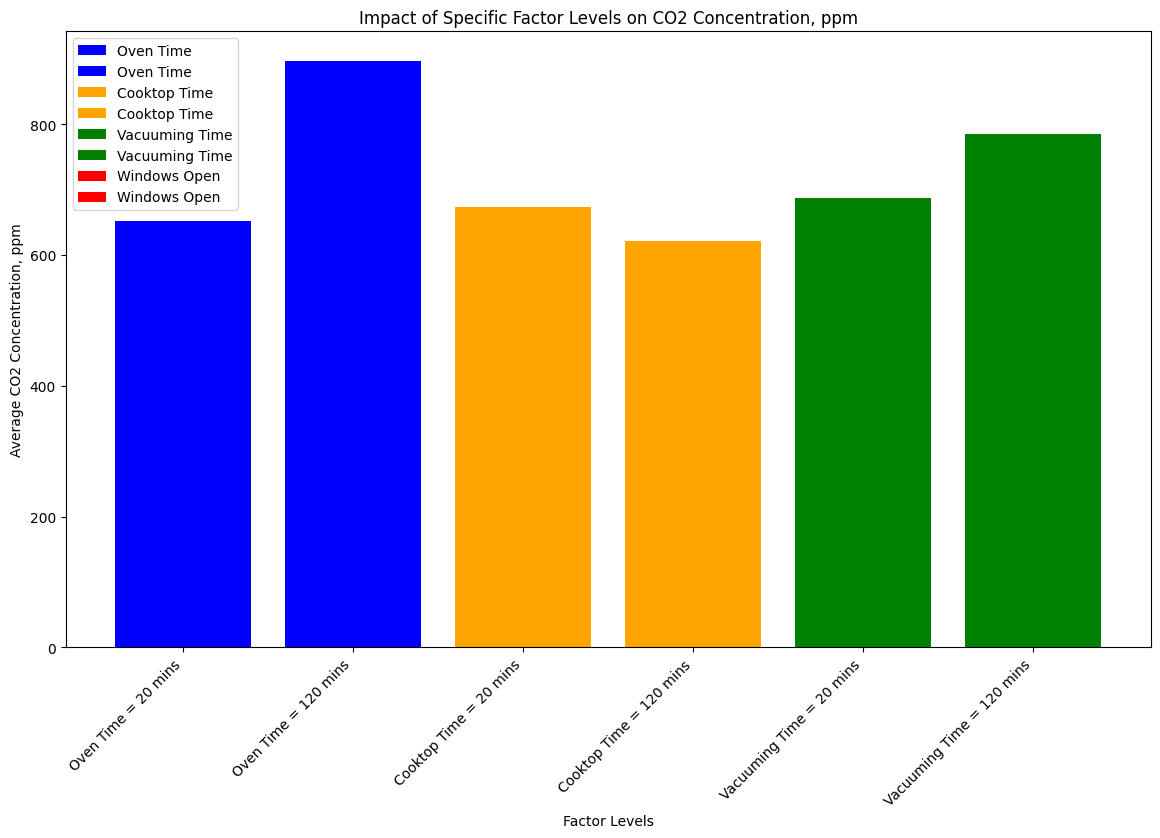

In [ ]:
#comparing 20 mins and 120 mins

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

factors = ['Oven', 'Cooktime','Vacuuming', 'Windows Open']
levels_to_compare = [20, 120]  # factor levels identified
colors = ['blue', 'orange', 'green', 'red']

# Create a bar plot for each factor level
plt.figure(figsize=(14, 8))
for i, factor in enumerate(factors):
    for level in levels_to_compare:
        subset_df = df[df[factor] == level]
        avg_concentration = subset_df['CO2'].mean()
        plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time = {level} mins', avg_concentration, color=colors[i], label=factor)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('Oven', 'Oven Time').replace('Cooktime', 'Cooktop Time').replace('Vacuuming', 'Vacuuming Time') for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Factor Levels')
plt.ylabel('Average CO2 Concentration, ppm')
plt.title('Impact of Specific Factor Levels on CO2 Concentration, ppm')
plt.show()


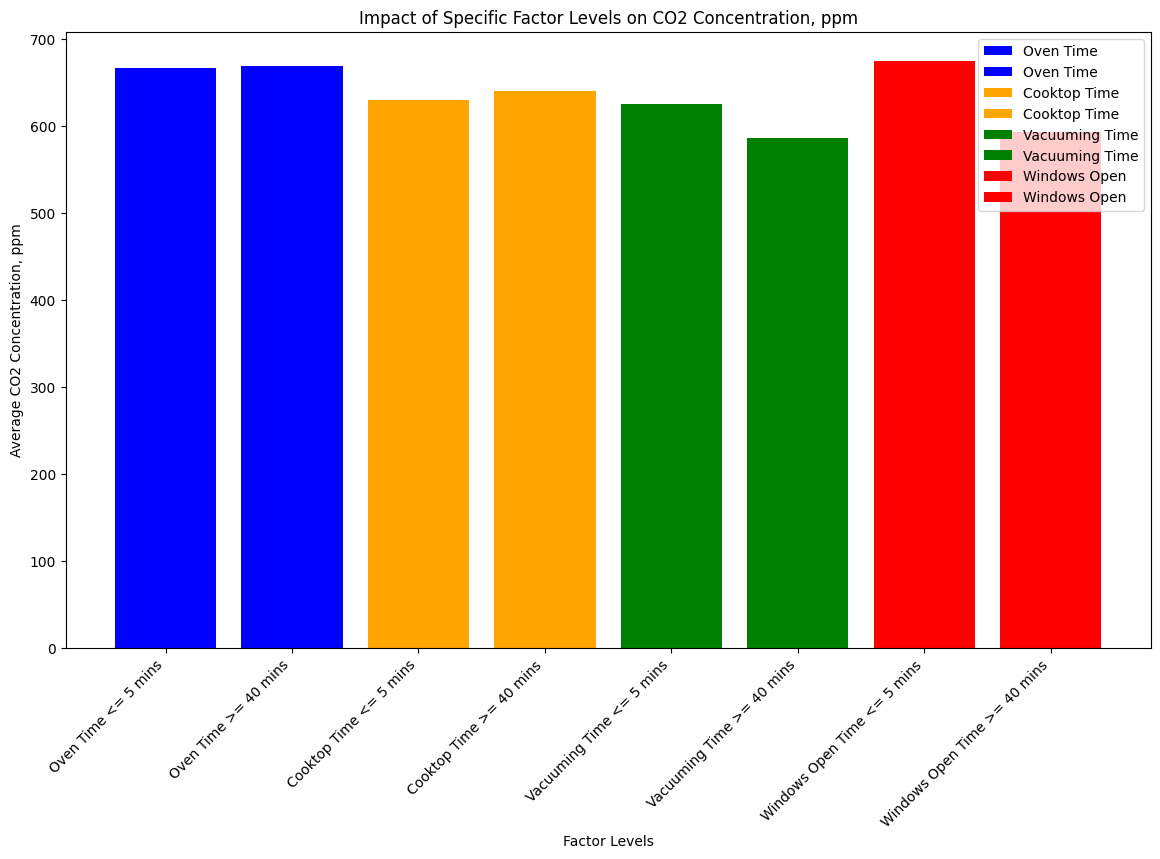

In [ ]:
#comparing 5 mins and 40 mins in duration, and impacts on CO2

file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

factors = ['Oven', 'Cooktime', 'Vacuuming', 'Windows Open']
small_value = 5
large_value = 40
colors = ['blue', 'orange', 'green', 'red']

# Convert relevant columns to numeric
df[factors] = df[factors].apply(pd.to_numeric, errors='coerce')

# Create a bar plot for each factor level
plt.figure(figsize=(14, 8))
for i, factor in enumerate(factors):
    # Calculate average concentration for values under or equal to the small value
    avg_concentration_below = df[df[factor] <= small_value]['CO2'].mean()
    plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time <= {small_value} mins', avg_concentration_below, color=colors[i], label=factor)

    # Calculate average concentration for values above or equal to the large value
    avg_concentration_above = df[df[factor] >= large_value]['CO2'].mean()
    plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time >= {large_value} mins', avg_concentration_above, color=colors[i], label=factor)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('Oven', 'Oven Time').replace('Cooktime', 'Cooktop Time').replace('Vacuuming', 'Vacuuming Time') for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Factor Levels')
plt.ylabel('Average CO2 Concentration, ppm')
plt.title('Impact of Specific Factor Levels on CO2 Concentration, ppm')
plt.show()


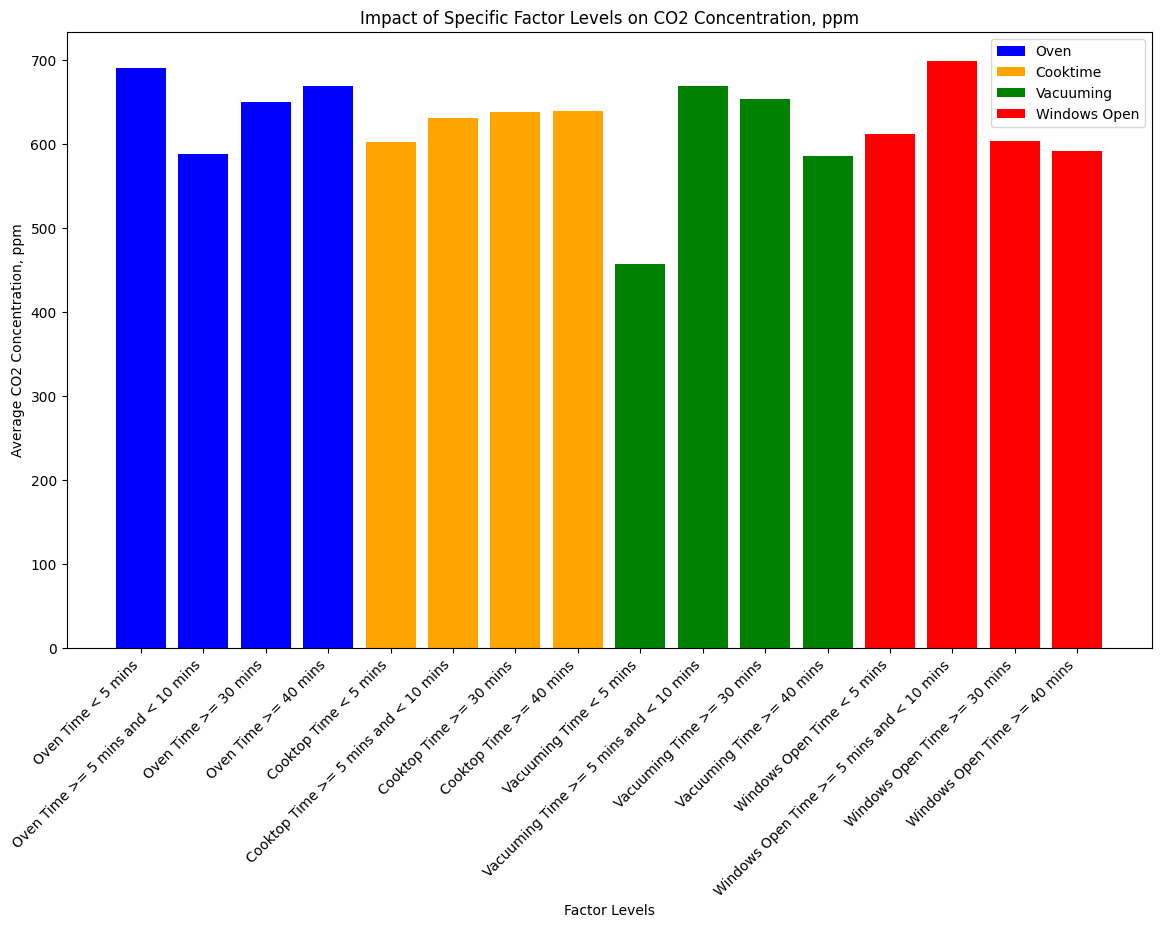

In [ ]:
#Graphical representation - compiled

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_1_path = '/content/drive/MyDrive/Code/File-1-total.csv'
df = pd.read_csv(file_1_path)

factors = ['Oven', 'Cooktime', 'Vacuuming', 'Windows Open']
value_thresholds = [5, 10, 30, 40]
colors = ['blue', 'orange', 'green', 'red']

# Convert relevant columns to numeric
df[factors] = df[factors].apply(pd.to_numeric, errors='coerce')

# Create a bar plot for each factor level
plt.figure(figsize=(14, 8))
handles = []
labels = []

for i, factor in enumerate(factors):
    factor_handles = []
    for threshold in value_thresholds:
        if threshold == 5:
            # Calculate average concentration for values smaller than 5
            avg_concentration_below_5 = df[df[factor] < 5]['CO2'].mean()
            handle = plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time < 5 mins', avg_concentration_below_5, color=colors[i], alpha=1)
        elif threshold == 10:
            # Calculate average concentration for values greater than or equal to 5 and less than 10
            avg_concentration_5_to_10 = df[(df[factor] >= 5) & (df[factor] < 10)]['CO2'].mean()
            handle = plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time >= 5 mins and < 10 mins', avg_concentration_5_to_10, color=colors[i], alpha=1)
        else:
            # Calculate average concentration for values greater than or equal to the threshold
            avg_concentration_above = df[df[factor] >= threshold]['CO2'].mean()
            handle = plt.bar(f'{factor.replace("Cooktime", "Cooktop")} Time >= {threshold} mins', avg_concentration_above, color=colors[i], alpha=1)

        factor_handles.append(handle[0])

    handles.append(factor_handles[0])  # Using only the first handle for each factor
    labels.append(factor)

# Create a single legend for all bars
plt.legend(handles, labels)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Factor Levels')
plt.ylabel('Average CO2 Concentration, ppm')
plt.title('Impact of Specific Factor Levels on CO2 Concentration, ppm')
plt.show()


